# Interferometry with a single photon

### Plot the probabilities $P_{01}$ and $P_{10}$ of a Mach-Zehner interferometer with a single photon

In [4]:
%matplotlib inline
from math import *
from qutip import *
from pylab import *
import numpy as np
import matplotlib.pyplot as plt

In [5]:
P_01 = []
P_10 = []

N = 2
a = destroy(N)

U = (1j*pi/4*(tensor(a.dag(),a)+tensor(a,a.dag()))).expm() # beam splitter operator

for t in arange(-2*pi,2*pi,0.1) :
    F = (1j*t*a.dag()*a).expm() #phase shift operator
    
    psi_in_vac = tensor(fock(N,0),fock(N,0))
    psi_in = tensor(qeye(N),a.dag()) * psi_in_vac
    psi_out = U*psi_in
    psi_out_mirror = tensor(qeye(N),F)*psi_out
    psi_out_2 = U*psi_out_mirror
    
    psi_01 = tensor(fock(N,0),fock(N,1))
    psi_10 = tensor(fock(N,1),fock(N,0))
    
    P_01.append((psi_01*psi_01.dag()*psi_out_2*psi_out_2.dag()).tr())
    P_10.append((psi_10*psi_10.dag()*psi_out_2*psi_out_2.dag()).tr())
    
P_01_array = np.array(P_01)
P_10_array = np.array(P_10)

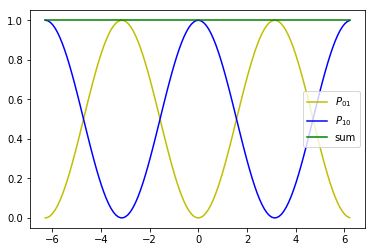

In [9]:
x = arange(-2*pi,2*pi,0.1)
plt.plot(x,P_01_array,'y',label=r'$P_{01}$')
plt.plot(x,P_10_array,'b',label=r'$P_{10}$')
plt.plot(x,P_01_array+P_10_array,'g',label='sum')

legend(loc='center right')